# Welcome to my notebook 

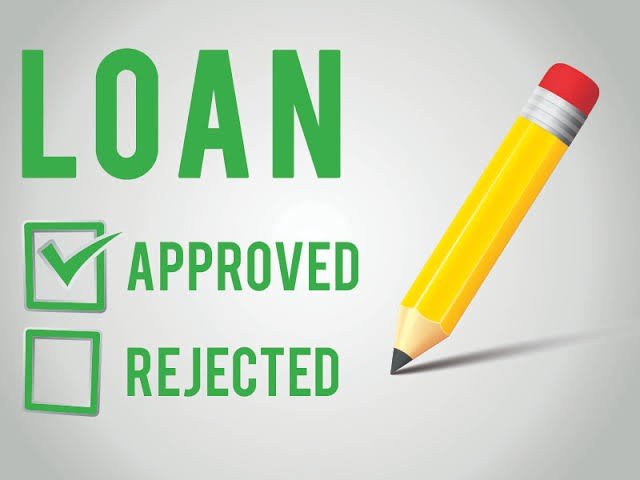

It is quite clear from the above picture on which topic we are going to work. Isn't it?

# LOAN PREDICTION ANALYSIS using Machine Learning Algorithms

Let's Say, You are the owner of the Housing Finance Company and you want to build your own model to predict the customers who are applying for the home loan and your company want to check and validate the customer who are eligible for the home loan.

# **PROBLEM STATEMENT**


Company wants to make automate the LOAN ELIGIBILITY PROCESS in a real time scenario related to customer's detail provided while applying application for home loan forms.

The simple process of creating the model is to use the training set and validate the model on the test set.

# Steps:

1. Importing Libraries and CSV files
2. Exploratory Data Analysis
3. Data Visualizations
4. Machine Learning Model Decision
5. Training the ML model
6. Predict Model
7. Deploy Model

# Importing Libraries and CSV Files

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Key Information:

1. Loan_ID--------------> Unique Loan ID.
2. Gender --------------> Male/ Female
3. Married --------------> Applicant married (Y/N)
4. Dependents ------------> Number of dependents
5. Education -------------> Applicant Education (Graduate/ Under Graduate)
6. Self_Employed ---------> Self-employed (Y/N)
7. ApplicantIncome -------> Applicant income
8. CoapplicantIncome -----> Coapplicant income
9. LoanAmount -----------> Loan amount in thousands
10. Loan_Amount_Term ------> Term of a loan in months
11. Credit_History --------> Credit history meets guidelines
12. Property_Area ---------> Urban/ Semi-Urban/ Rural
13. Loan_Status -----------> Loan approved (Y/N)

In [4]:
loan_train = pd.read_csv("loan-train.csv")
loan_test = pd.read_csv("loan-test.csv")

In [5]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan_train.shape

(614, 13)

We have 614 rows and 13 features

In [22]:
print(loan_train['Gender'].value_counts())
print("--"*15)
print(loan_train['Married'].value_counts())
print("--"*15)
print(loan_train['Education'].value_counts())
print("--"*15)
print(loan_train['Property_Area'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
------------------------------
Yes    398
No     213
Name: Married, dtype: int64
------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [23]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We need to fill the missing values of both our test and train set.

We can use fillna() function

In [37]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace = True) #mean
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace = True) #mean

In [39]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

# Convert Categorical variable with Numerical values.¶


In [59]:
loan_train['Gender']=loan_train.Gender.astype(object)
loan_test['Self_Employed']=loan_test.Self_Employed.astype(object)
loan_test['Gender'] = loan_test.Gender.astype(object)
loan_train['Loan_Status'] = loan_train['Loan_Status'].replace({"Y":1, "N":0})

In [63]:
loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [64]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

In [65]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
loan_train['Property_Area'].uniqueue()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [70]:
loan_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [72]:
loan_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

The above three features have more than one value, so we can use Label Encoder(sklearn package) on the features.

**What is Label Encoder?**

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

**Limitation of label Encoding**
Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issue in training of data sets. A label with high value may be considered to have high priority than a label having lower value.

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
feature_col = ['Property_Area','Education','Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [76]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


All the features are transformed properly to numerical values.

# DATA VISUALIZATION

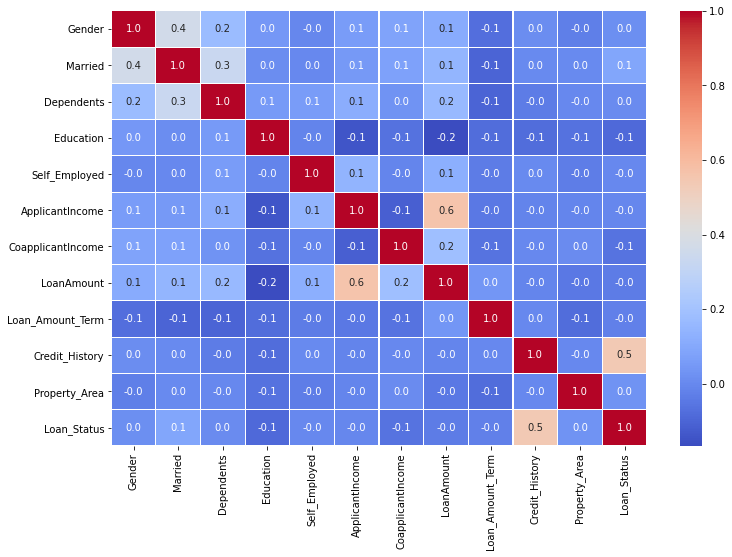

In [77]:
#checking the correlation between independent variables

plt.figure(figsize = (12,8))
sns.heatmap(loan_train.corr(), cmap = 'coolwarm', annot = True, fmt = '.1f', linewidths= 0.1)
plt.show()

We have LoanAmount and ApplicationIncome as moderately correlated.
We have Credit History and Loan_status as moderately correlated. 

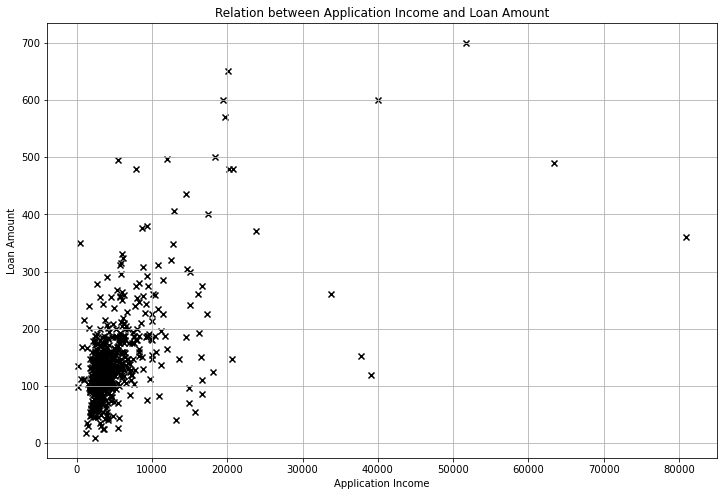

In [79]:
plt.figure(figsize=(12,8))
plt.title('Relation between Application Income and Loan Amount')

plt.grid()
plt.scatter(loan_train['ApplicantIncome'], loan_train['LoanAmount'], c = 'k', marker = 'x')
plt.xlabel('Application Income')
plt.ylabel('Loan Amount')
plt.show()

In [100]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Married'>

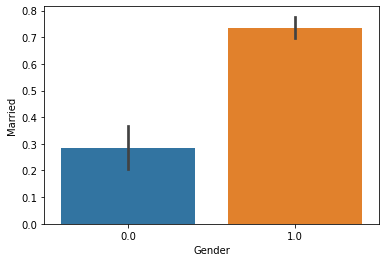

In [105]:
sns.barplot(x='Gender', y='Married',data = loan_train )

Here, Males are 1 and Females are 0, so the above graph shows us that the dataset contains more married males who might be interested in taking the loan.

<AxesSubplot:xlabel='Education', ylabel='Gender'>

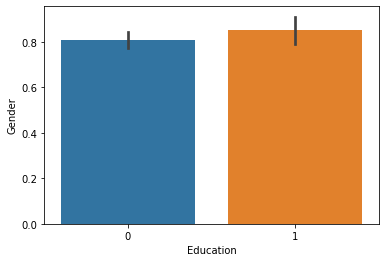

In [109]:
sns.barplot(x='Education', y='Gender', data=loan_train)

# Creating ML Model using Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_scorecore

In [81]:
logmodel = LogisticRegression()

In [84]:
train_features = ['Credit_History','Education','Gender']
X_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

X_test = loan_test[train_features].values


**Fitting the model**

In [86]:
logmodel.fit(X_train,y_train)

LogisticRegression()

**Predicting the model on test set**

In [87]:
predicted = logmodel.predict(X_test)

In [88]:
# check the coefficeints of the trained model
print('Coefficient of model :', logmodel.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [89]:
# check the intercept of the model
print('Intercept of model',logmodel.intercept_)

Intercept of model [-1.98307795]


In [90]:
# accuracy_train = accuracy_score(x_test, predicted)
score = logmodel.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [111]:
# predict the target on the test dataset
predict_test = logmodel.predict(X_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


# Deploy Model

**We can use Pickle to export our model and store it.**
Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions

In [94]:
# save the model to disk
import pickle as pkl
filename = 'logistic_model.pkl'
pkl.dump(logmodel, open(filename, 'wb')) # wb means write as binary

# Thank you so much!